## 2. Supervised machine learning: linear regression
- Train, test, and validate a machine learning model for prediction of the income of a new employee 
- Apply appropriate measures for assessing the quality of the model

In [32]:

import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import r2_score



In [33]:
dataset = '..\data\cleaned_HR-Employee-Attrition.csv'
df = pd.read_csv(dataset, header=0)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rebec\AppData\Local\Temp\ipykernel_109156\2609251188.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset = '..\data\cleaned_HR-Employee-Attrition.csv'


### Train, test, and validate a machine learning model for prediction of the income of a new employee

#### Choose Dependent and Independent Variables

In [34]:
y = df['MonthlyIncome'] # Dependent
X = df.drop(['MonthlyIncome'], axis=1) #Independent

#### Split the data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [36]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(662, 18)
(662,)
(117, 18)
(117,)


#### Train a Linear Regression model

In [37]:
reg_instance = LinearRegression()

In [38]:
reg_instance.fit(X_train, y_train)
reg_instance

LinearRegression()

In [39]:
a = reg_instance.coef_
b = reg_instance.intercept_

In [40]:
a

array([  66.17735541,   11.89393905,   42.74120456,  -12.97554498,
         30.26716854,   -4.05461359, 3237.77308361,  -35.23096847,
         31.05282354, -159.97207355,  -60.0706745 ,  -11.91104884,
         12.88029287,   48.94484196, -325.1141161 ,  118.35581946,
         55.28533649, -157.29622855])

In [41]:
b

-210.59260078603256

### Predict income for a new employee

In [42]:
# Find Possible Values for Each Column
for col in X.columns:
    print(f"{col}: {df[col].unique()}")

OverTime: [1 0]
StockOptionLevel: [0 2 1]
TotalWorkingYears: [ 7  8 17 10  5  3  6  1 13  2  4 25 20 16 24  9 12  0 18 15 19 11 28 14
 21 22 27 23]
YearsAtCompany: [ 0  8  7  9  5  2  4  1  3 12  6 10 15 16 11 13 17 14 18]
YearsInCurrentRole: [ 0  7  5  2  6  1  3  4 13  8 11  9 12 10 14]
Age: [37 33 32 36 29 31 34 28 22 38 42 24 43 50 35 26 45 59 30 55 23 46 44 25
 19 49 41 51 39 40 27 57 56 53 54 52 21 18 58 47 48 60 20]
JobLevel: [1 2 3 4]
YearsWithCurrManager: [ 0  6  7  8  3  2 11  4  1  9 10  5 12 13]
MaritalStatus: [2 1 0]
JobInvolvement: [2 3 4 1]
EnvironmentSatisfaction: [4 3 1 2]
DistanceFromHome: [ 2  3 27 15 26 19 24 16  7  6  8  1  4 25  5 11 23  9 18 22 20 28 12 29
 21 14 17 13 10]
JobSatisfaction: [3 4 2 1]
JobRole: [2 6 0 5 7 8 4 1 3]
Department: [1 2 0]
BusinessTravel: [2 1 0]
EducationField: [4 1 3 2 5 0]
Attrition: [1 0]


In [43]:
new_employee = np.array([[1, 2, 10, 5, 2, 42, 2, 6, 2, 2, 3, 11, 2, 5, 2, 1, 4, 1 ]])  

predicted_income = reg_instance.predict(new_employee)
print(f"Predicted Monthly Income for new employee: {predicted_income[0]:.2f}")

Predicted Monthly Income for new employee: 5629.69


c:\Users\rebec\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Apply appropriate measures for assessing the quality of the model

In [44]:
y_predicted = reg_instance.predict(X_test)

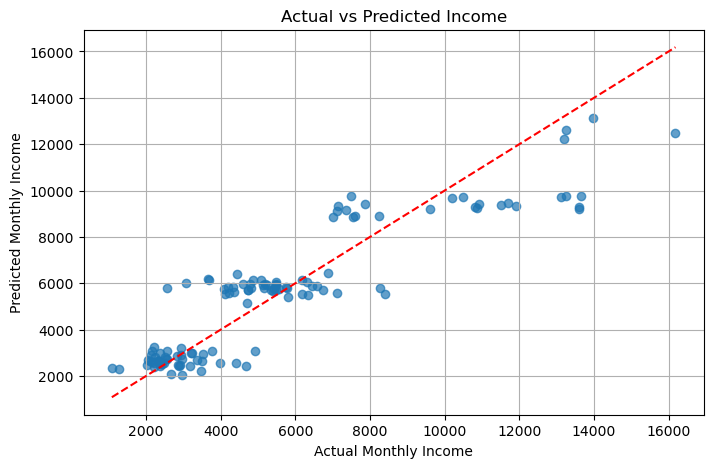

In [45]:
# Visualize predictions# 
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predicted, alpha=0.7)
plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Actual vs Predicted Income")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()

#### Actual vs Predicted Income
* Each blue dot is a employee from the test set
* A dot above the line = Model overestimated employee’s income.
* A dot below the line = Model underestimated their income.

* Low "Actual income" (e.g., 2000–6000), the model predicts those salaries    quite accurately.
* High "Actual income" (e.g., 7000-16000), the model has less accurate predictions.


### Model Evaluation

In [46]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

1104.1180858986404


In [47]:
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

2163217.2008611676


In [48]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

1470.7879523783051


In [49]:
r2 = r2_score(y_test, y_predicted)
print(f"R² Score: {r2}")

R² Score: 0.8126578841701133


In [50]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1104.12
Mean Squared Error (MSE): 2163217.20
Root Mean Squared Error (RMSE): 1470.79
R² Score: 0.81
